<a href="https://colab.research.google.com/github/ChinmoyKumerRoy/ChinmoyKumerRoy/blob/main/auto_encoder_NamtaDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np  

In [ ]:
x = np.load('/content/drive/My Drive/Colab Notebooks/LICT/NamtaDB_64_npy/NamtaDB_64_x.npy')/255

In [ ]:
x.shape

(72045, 64, 64)

In [ ]:
x_reshape = x.reshape(-1,64,64,1)

In [ ]:
x_reshape.shape

(72045, 64, 64, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Flatten, Dropout

model = Sequential()
    
    
    
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))  
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2DTranspose(512, (3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2DTranspose(512, (3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2DTranspose(256, (3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))  
model.add(Conv2DTranspose(128, (3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2DTranspose(64, (3, 3), padding='same', activation='relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2DTranspose(1, (3, 3), padding='same', activation='relu'))

model.compile(loss='mse', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 8, 8, 512)       

In [ ]:
history = model.fit(x_reshape, x_reshape, batch_size=250, epochs=20)

Epoch 1/20
72045/72045 [==============================] - 61s 843us/step - loss: 0.1368
Epoch 2/20
72045/72045 [==============================] - 51s 706us/step - loss: 0.0216
Epoch 3/20
72045/72045 [==============================] - 51s 704us/step - loss: 0.0160
Epoch 4/20
72045/72045 [==============================] - 51s 708us/step - loss: 0.0139
Epoch 5/20
72045/72045 [==============================] - 51s 707us/step - loss: 0.0128
Epoch 6/20
72045/72045 [==============================] - 51s 707us/step - loss: 0.0120
Epoch 7/20
72045/72045 [==============================] - 51s 707us/step - loss: 0.0113
Epoch 8/20
72045/72045 [==============================] - 51s 708us/step - loss: 0.0107
Epoch 9/20
72045/72045 [==============================] - 51s 707us/step - loss: 0.0102
Epoch 10/20
72045/72045 [==============================] - 51s 709us/step - loss: 0.0097
Epoch 11/20
72045/72045 [==============================] - 51s 708us/step - loss: 0.0094
Epoch 12/20
72045/72045 [=====

Text(0.5, 1.0, 'generated')

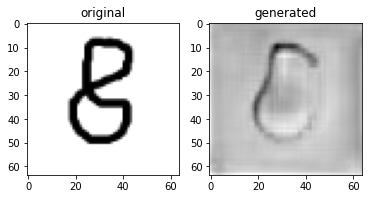

In [ ]:
import cv2
img = cv2.imread('/content/4.png',0)
img = cv2.resize(img, (64,64))
pred = model.predict(img.reshape(1,64,64,1))

plt.subplot(121)
plt.imshow(img.reshape(64,64), cmap='gray')
plt.title('original')

plt.subplot(122)
plt.imshow(pred.reshape(64,64), cmap='gray')
plt.title('generated')